<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = '../../DATA/titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [4]:
# Check Head
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Tail

In [5]:
# Check Tail
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Shape

Find shape of dataset.

In [6]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [7]:
# ANSWER
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Age should not be float. 
* Ticket contains alphabet and number.

## Check Null Values

Check whether dataset have any null values.

In [8]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Out of 891 recordes, 177 is missing in age and 687 is missing the information about cabin. This is significant. 

* Check two embarked individuals.

In [3]:
titanic[titanic["Embarked"].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

Based on this info, https://www.encyclopedia-titanica.org/titanic-survivor/, they embarked from Southampton. Miss Amelie Icard was a made of Mirs George Nelson Stone. 

In [8]:
#titanic[titanic["Embarked"].isna()]["Embarked"] = 'S'

titanic.loc[titanic["Embarked"].isna(),"Embarked"] = 'S'

In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# note need at the moment. 
titanic_long = pd.melt(titanic, id_vars=['PassengerId'], value_vars=['Age'])
titanic_long.head()

PassengerId variable  value
0            1      Age   22.0
1            2      Age   38.0
2            3      Age   26.0
3            4      Age   35.0
4            5      Age   35.0

In [ ]:
# Check titanic data again
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [12]:
# ANSWER
titanic[titanic['Age'].isna()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [18]:
titanic.groupby(by='Pclass')['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

### Impute age
Fill in missing value for age can be:
* 0 because we don't know.
    * con: If you want to find the average, it will skew. 
* negative values - coded as a missing value
    * con: the same issue as 0. 
* using average to impute
    * using the average of each gender, or Pclass
* Would median be a better value than average?

In [20]:
titanic.groupby(by=['Pclass','Sex'])["Age"].agg(['mean','median'])

mean  median
Pclass Sex                      
1      female  34.611765    35.0
       male    41.281386    40.0
2      female  28.722973    28.0
       male    30.740707    30.0
3      female  21.750000    21.5
       male    26.507589    25.0

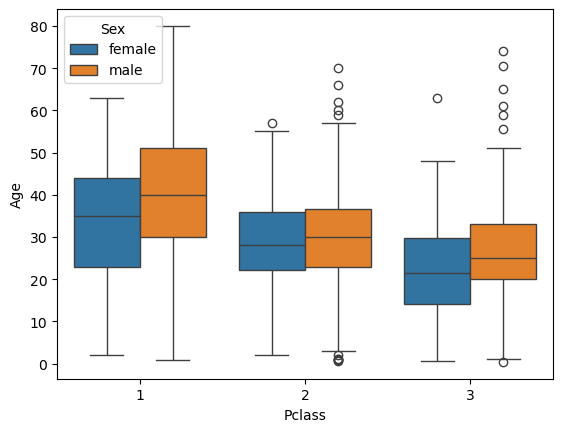

In [23]:
a = titanic.groupby(by=['Pclass','Sex'])["Age"].agg(['mean','median'])
import seaborn as sns

sns.boxplot(data=titanic, x='Pclass', y='Age', hue='Sex')
plt.show()

For this dataset, age mean and age median are pretty much the same. The reason that median might be better is to prevent the data being skewed by the outlier (i.e. extreme old person in the class, gender).

From boxplot, the IQR of male and female between Pclass overlap. It doesn't indicate that there will be significantly different in age between classes. 

Anyway, let's fill the age nan with the median age from the PClass and gender. 

In [24]:
# ANSWER
titanic['Age'].fillna(titanic.groupby(by='Sex')['Age'].transform('median'), inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Cabin

A lot of missing value - 77%. 
Ricky suggested that one of the solution is to get rid of it because there are too many missing values.
But, based on the ship blueprint, it seems that the missiing value might be for the lower class which uses the common open space (no cabin number).

Look at the Cabin:
1. First clean the cabin data by getting rid of numeric values.
2. Fill the missing values. 

In [25]:
titanic['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [26]:
# This keeps the first character of the cabin.
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)


In [27]:
titanic['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [41]:
titanic.groupby(by=['Cabin','Pclass'])['Fare'].agg(['min','median','max'])

min    median       max
Cabin Pclass                             
A     1        0.0000  35.50000   81.8583
B     1        0.0000  80.00000  512.3292
C     1       26.5500  83.47500  263.0000
D     1       25.9292  75.25000  113.2750
      2       12.8750  13.00000   13.7917
E     1       25.5875  55.00000  134.5000
      2       10.5000  11.42500   13.0000
      3        8.0500  12.47500   12.4750
F     2       10.5000  26.00000   39.0000
      3        7.6500   7.65000   22.3583
G     3       10.4625  13.58125   16.7000
T     1       35.5000  35.50000   35.5000

In [36]:
from IPython import display

Image source: https://www.encyclopedia-titanica.org/titanic-deckplans/ 

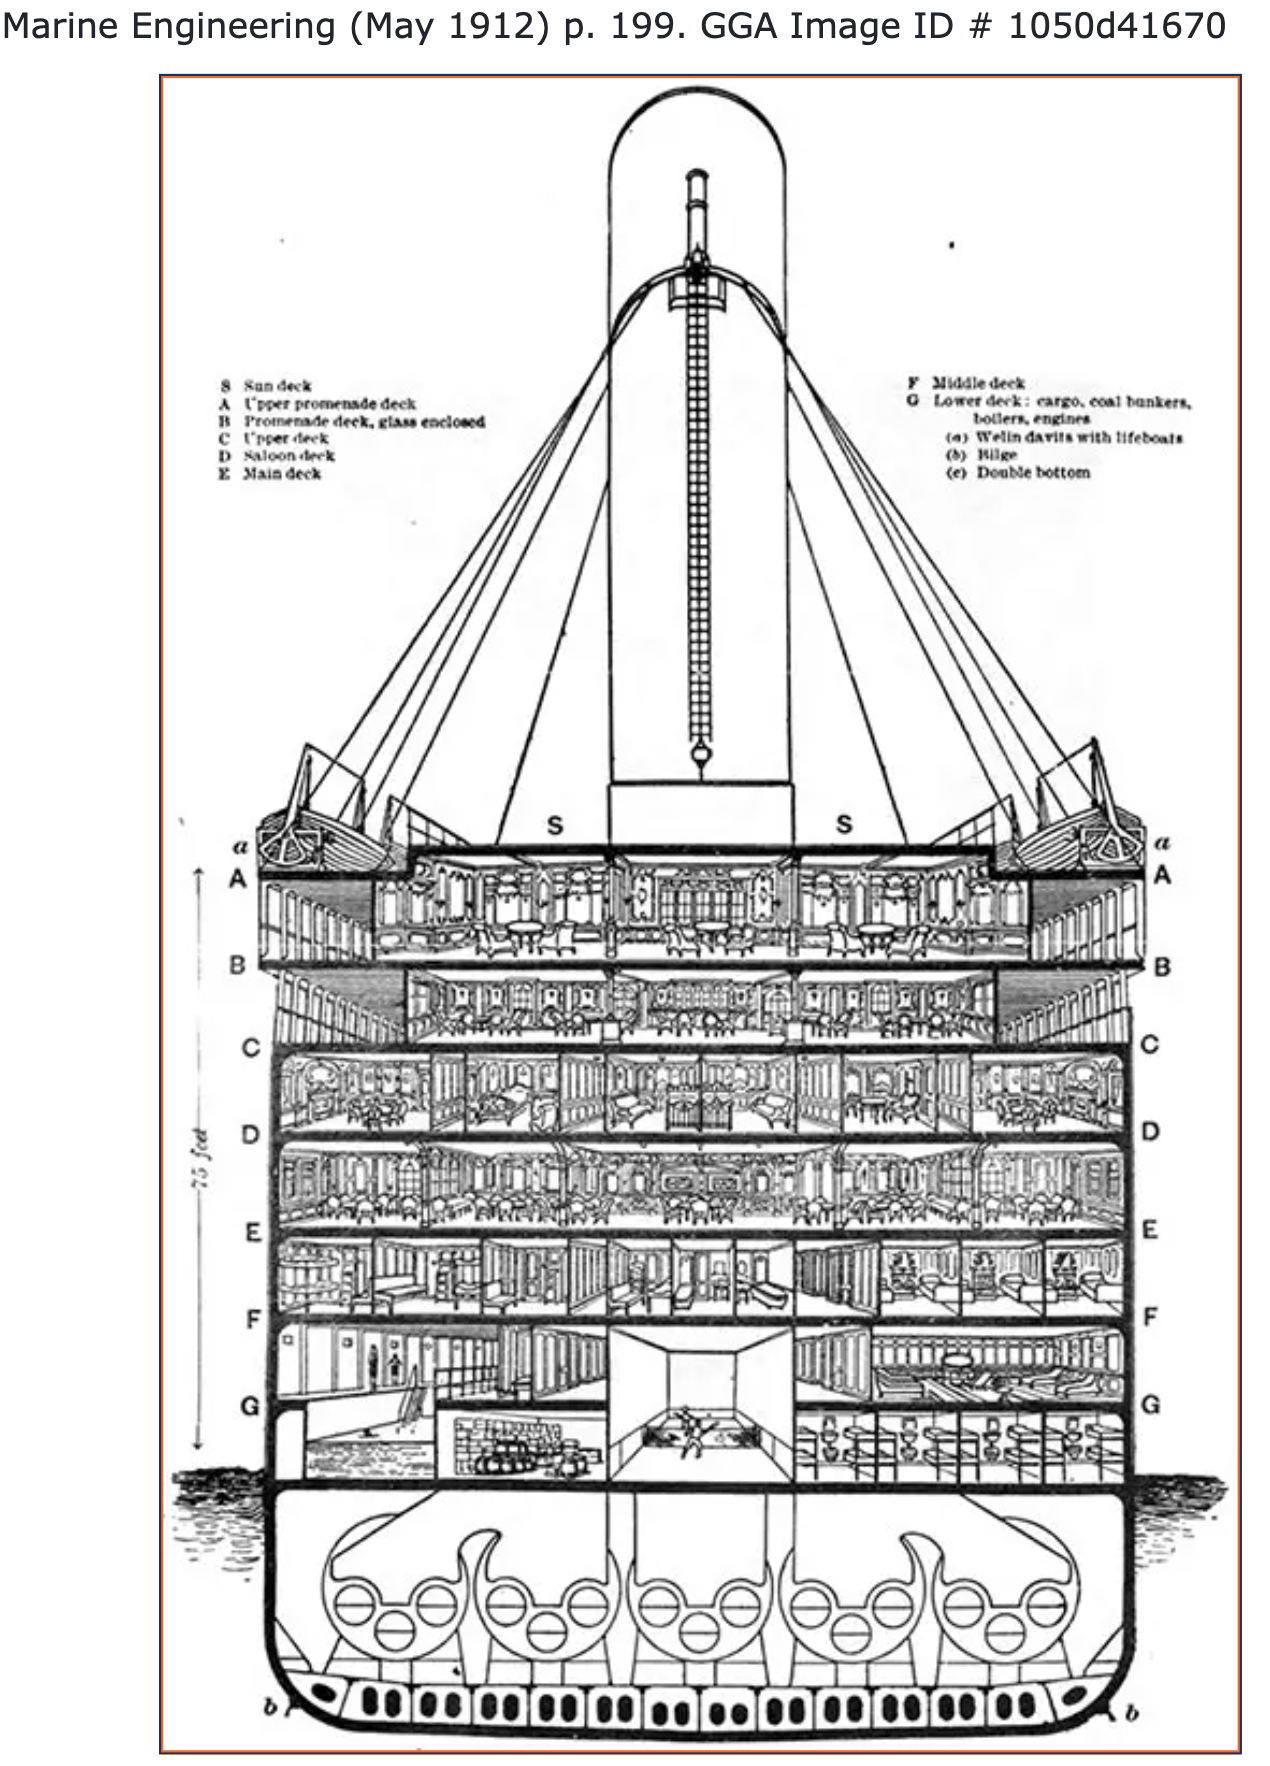

In [38]:
display.Image('image/titanic_deck_plan.png')


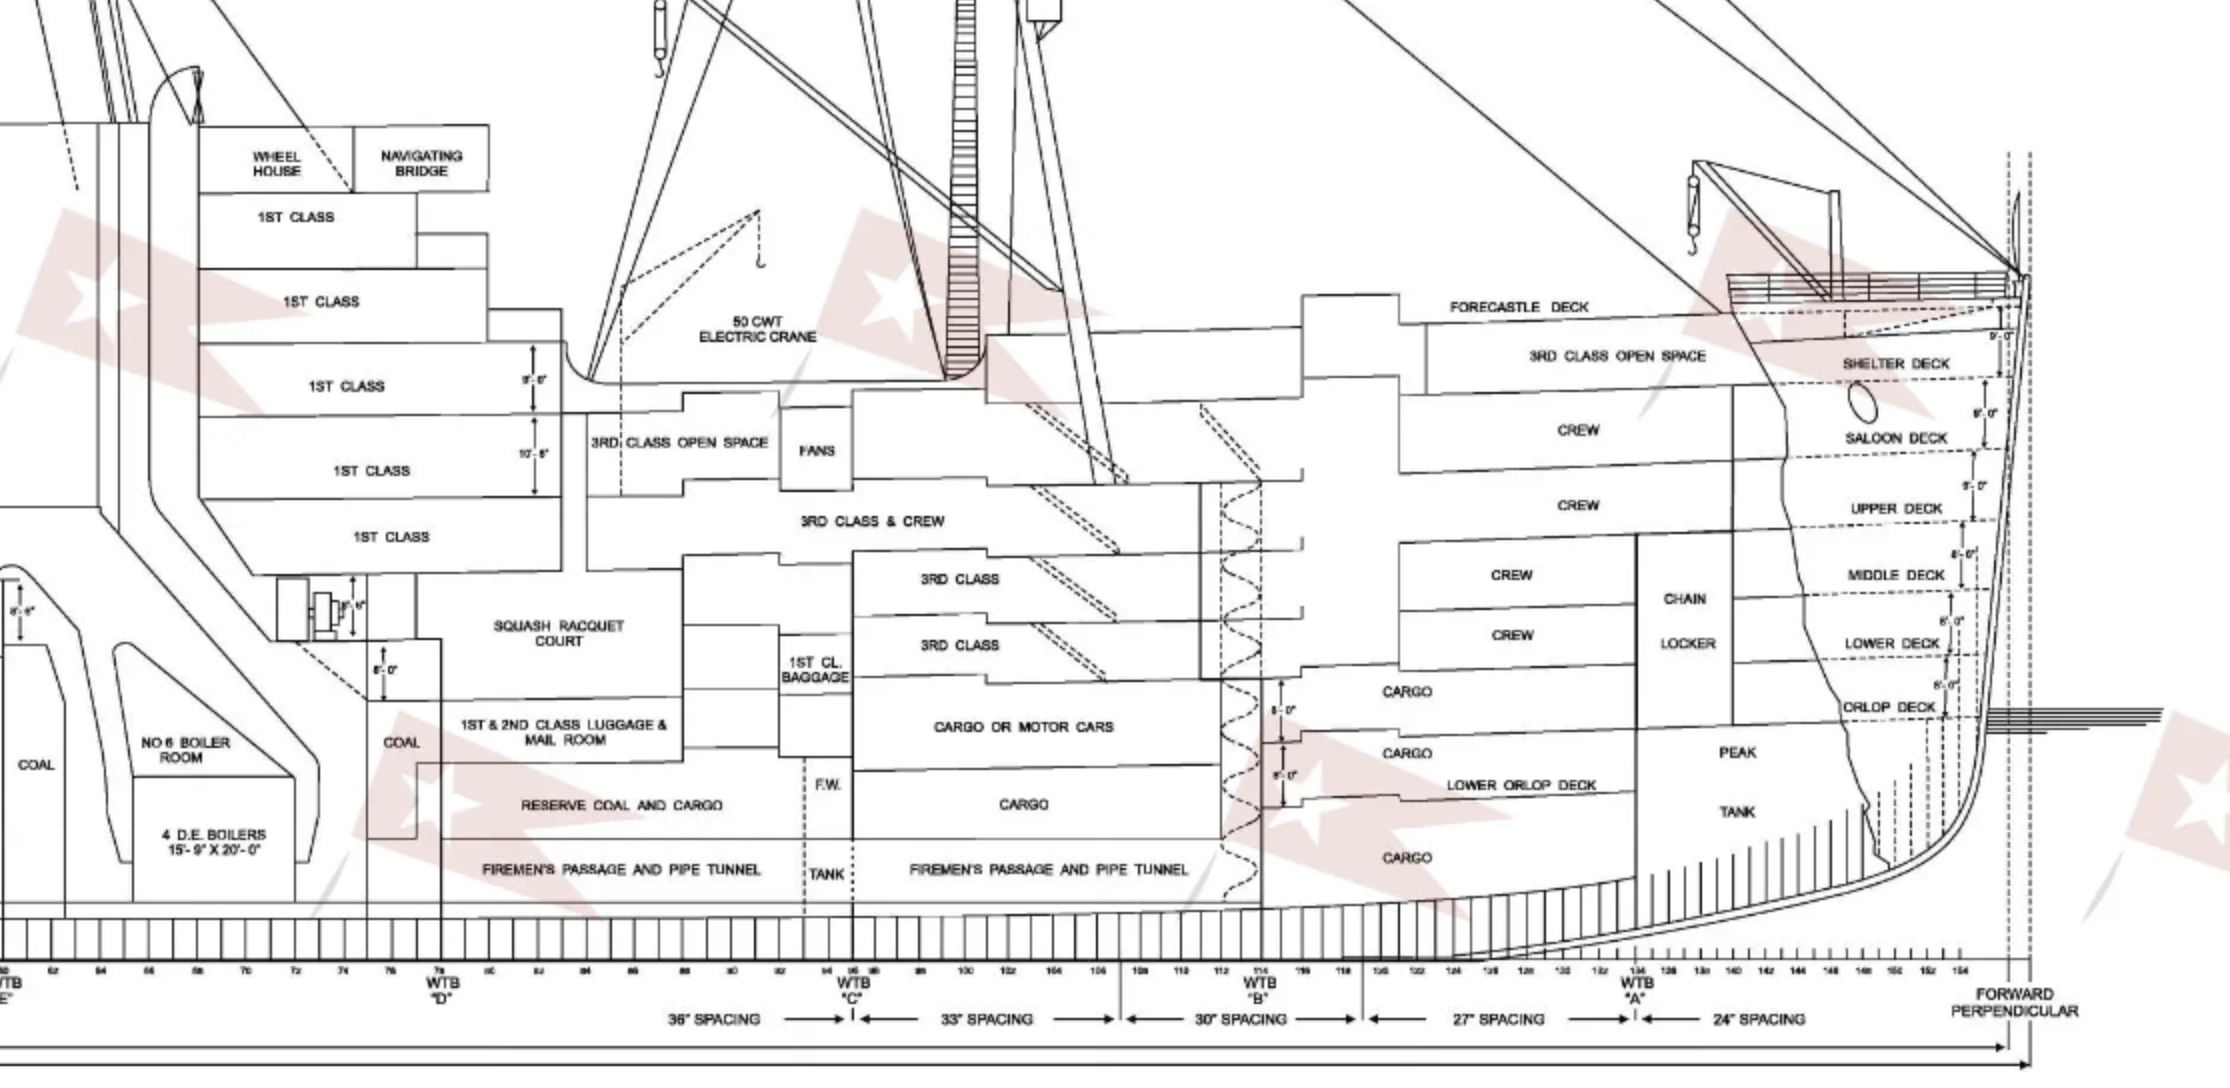

In [39]:
display.Image('image/titanic_front_end.png')


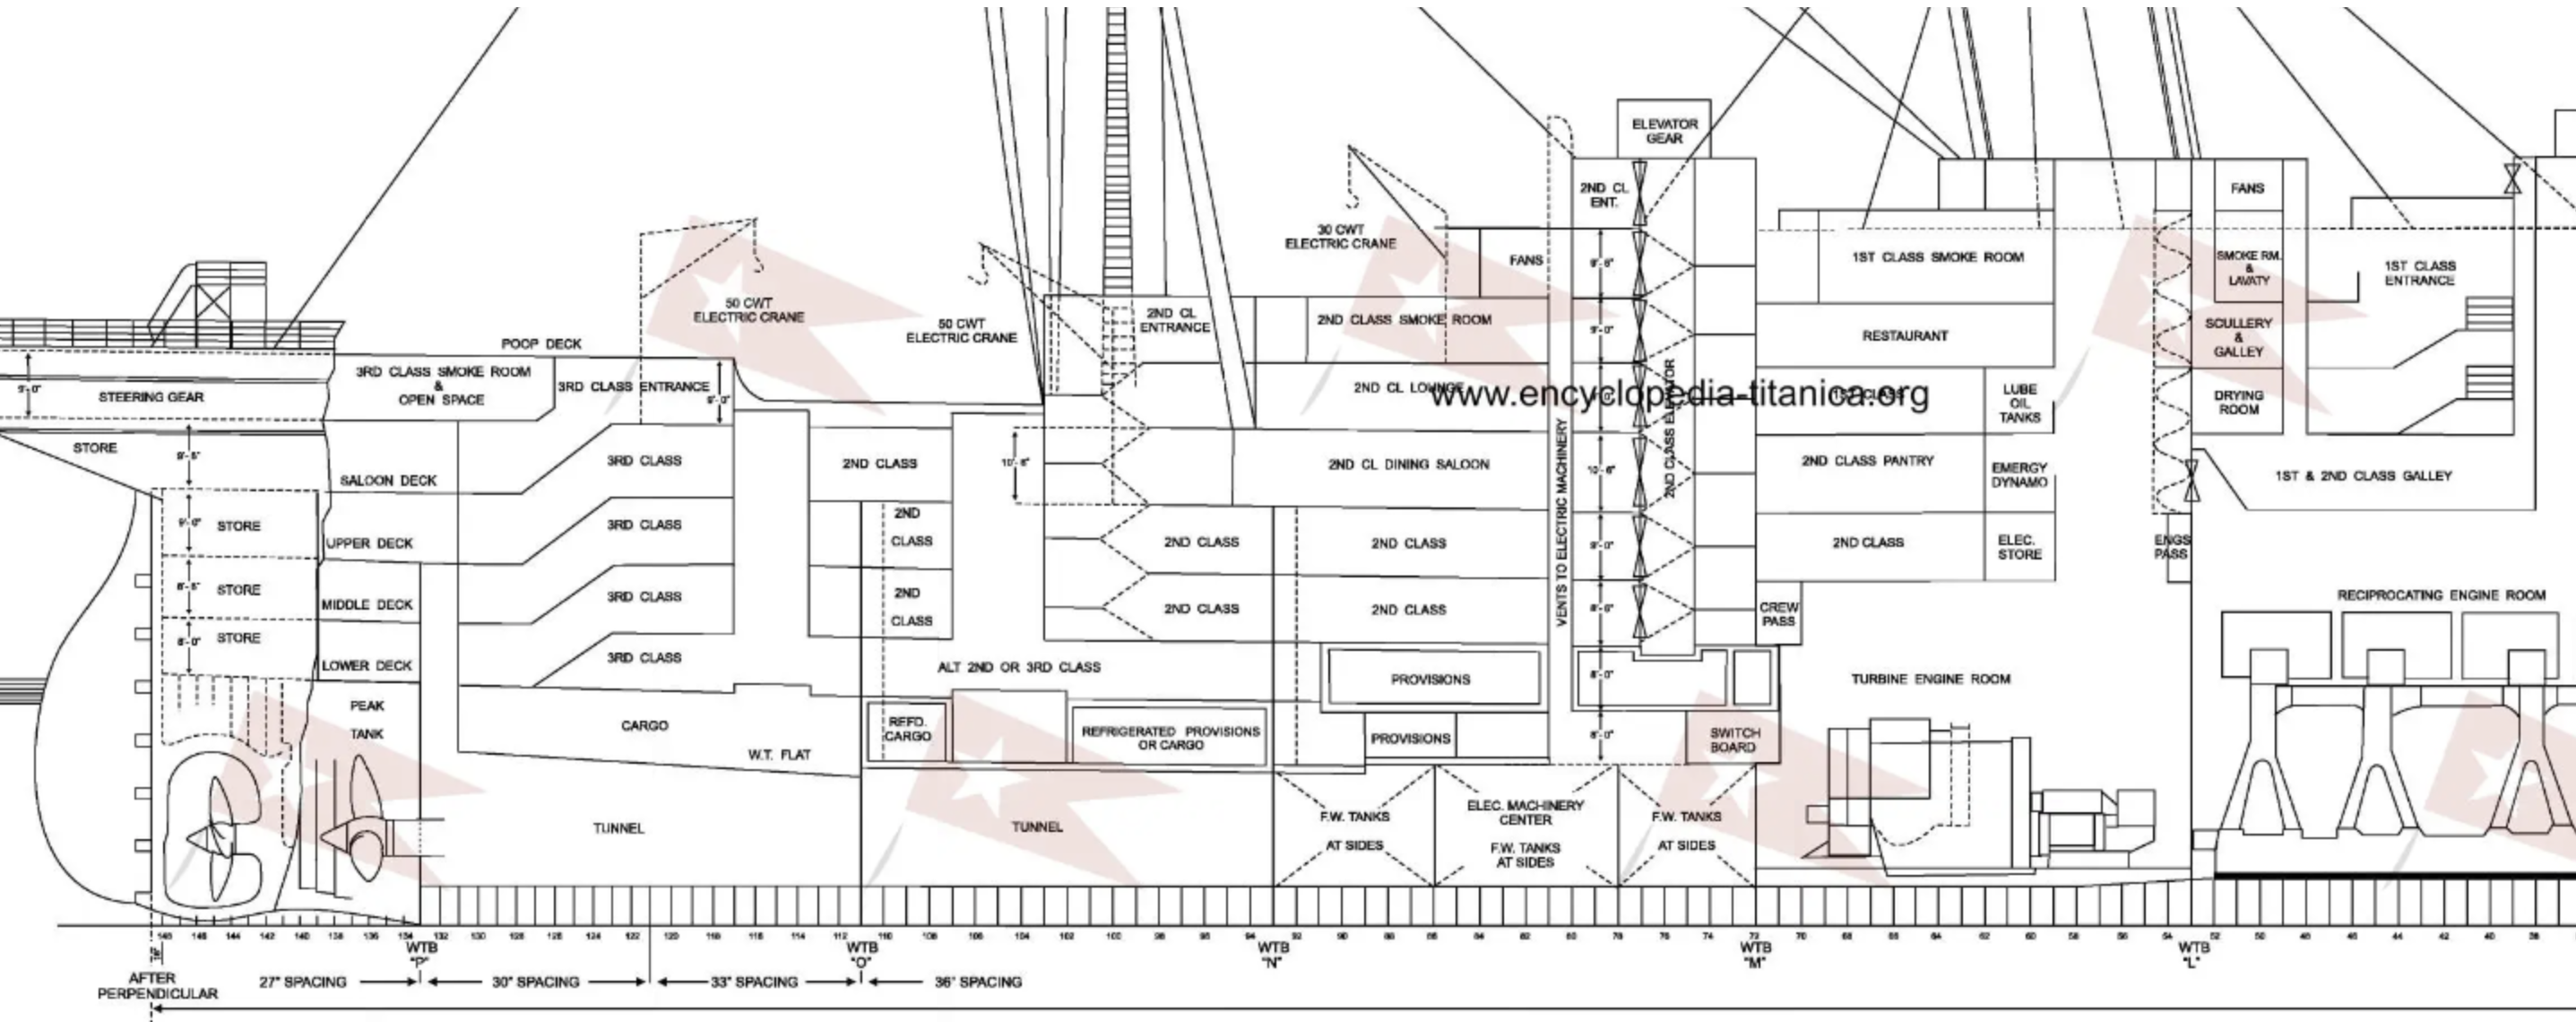

In [40]:
display.Image('image/titanic_deck_rear_end.png')

Based on the titanic deck map:
- First class can spread through Deck A, B, C, D. It seems to be at the front of the ship.  
- Second class spread from Deck B,C, D, E. It seems to be at the rear of the ship.
- Third class spread from D,E,F,G,T. 

Conclusion: PClass cannot give the location where the cabin is. That also reflects on the fare price for each class and each cabin. 

It also seems that the data for the fare price might be incorrect. For example, it is strange that the minimum fare price for Pclass 1 is 0. 

In [42]:
titanic.loc[(titanic['Pclass'] ==1) & (titanic['Fare'] == 0)]

PassengerId  Survived  Pclass                             Name   Sex  \
263          264         0       1            Harrison, Mr. William  male   
633          634         0       1    Parr, Mr. William Henry Marsh  male   
806          807         0       1           Andrews, Mr. Thomas Jr  male   
815          816         0       1                 Fry, Mr. Richard  male   
822          823         0       1  Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
263  40.0      0      0  112059   0.0     B        S  
633  29.0      0      0  112052   0.0   NaN        S  
806  39.0      0      0  112050   0.0     A        S  
815  29.0      0      0  112058   0.0     B        S  
822  38.0      0      0   19972   0.0   NaN        S

In [30]:
titanic[titanic['Cabin'].isna()]['Fare'].agg(['min','max','mean','median'])

min         0.000000
max       512.329200
mean       19.157325
median     10.500000
Name: Fare, dtype: float64

The records that have the cabin = na also has a wide range of fare from 0 to 512. 

I don't think we should fill the NA value for the Cabin based on the data available at this moment. 

### Embarked

In [ ]:
# ANSWER
# Done early on. 

# Describe

Describe your dataset.

In [44]:
# ANSWER
titanic.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          891.0   29.441268   13.018747  0.42   22.0000   29.0000   35.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

## Pclass, Sex, Parch, SibSp, embarked absolute number

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

In [124]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''

    font = {'size': 20}
    plt.rc('font', **font)
    
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show()


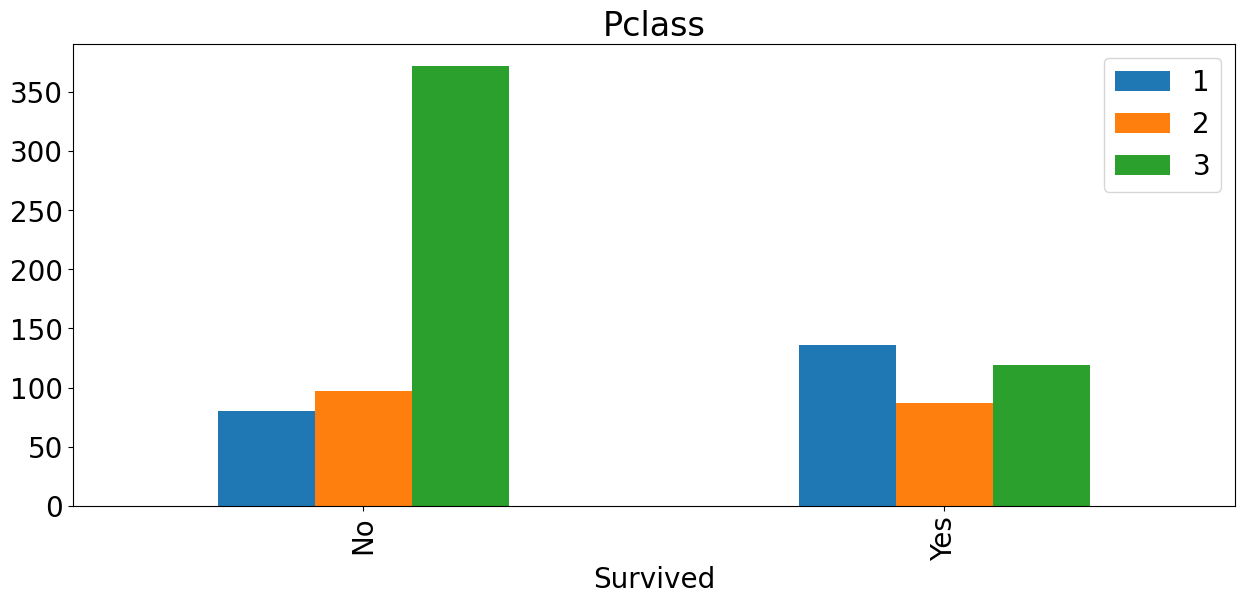

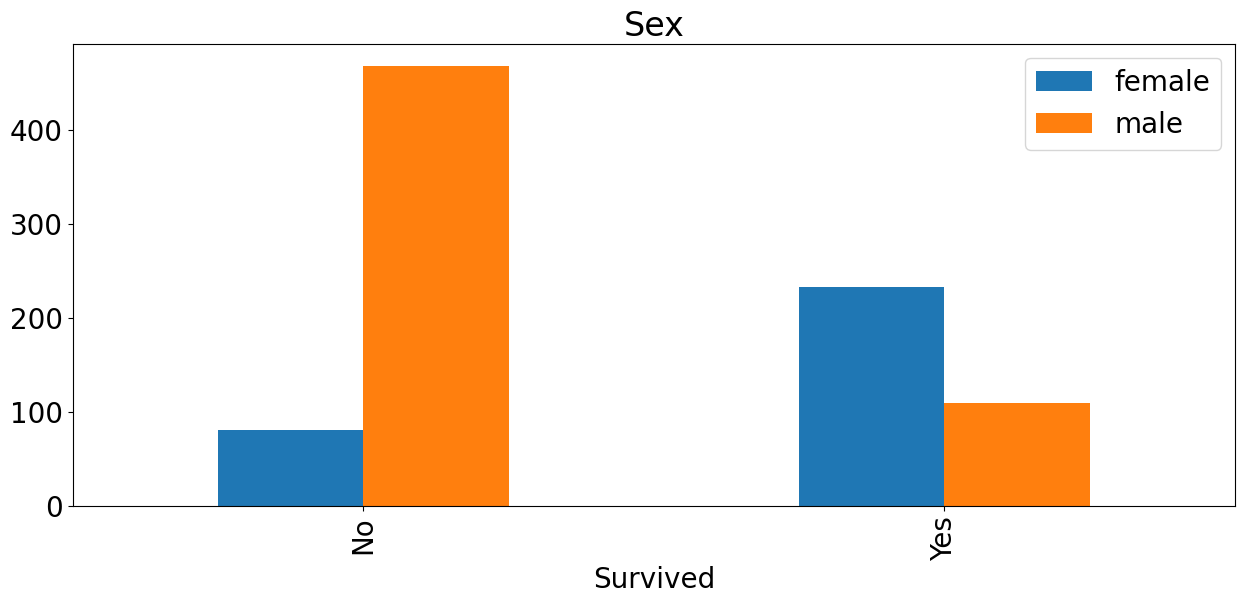

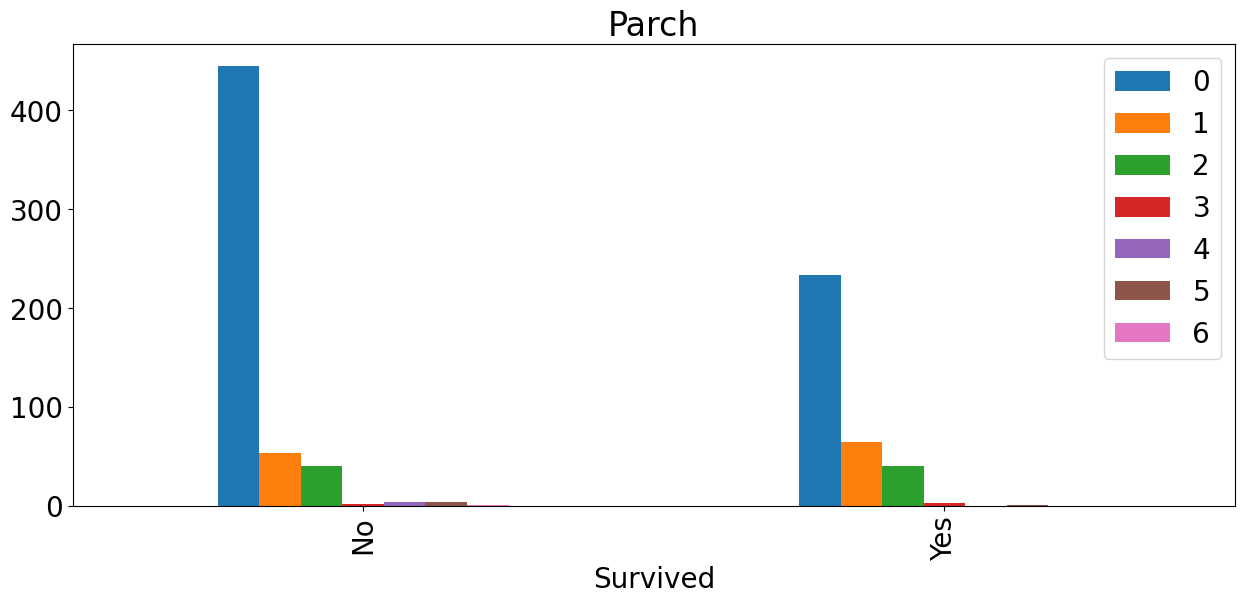

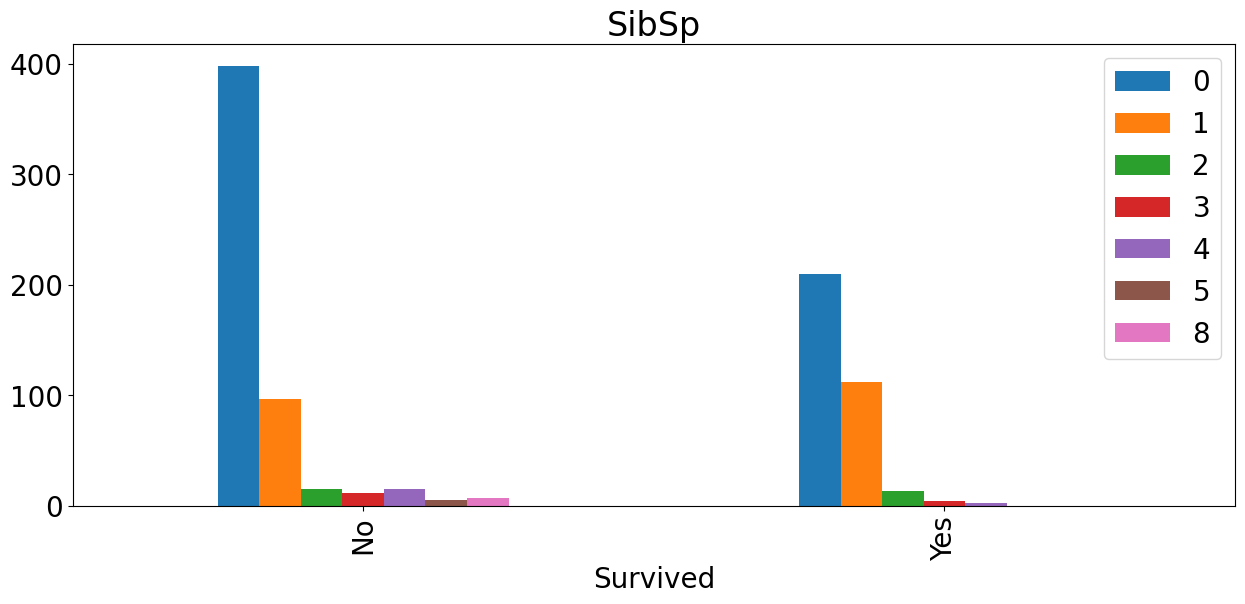

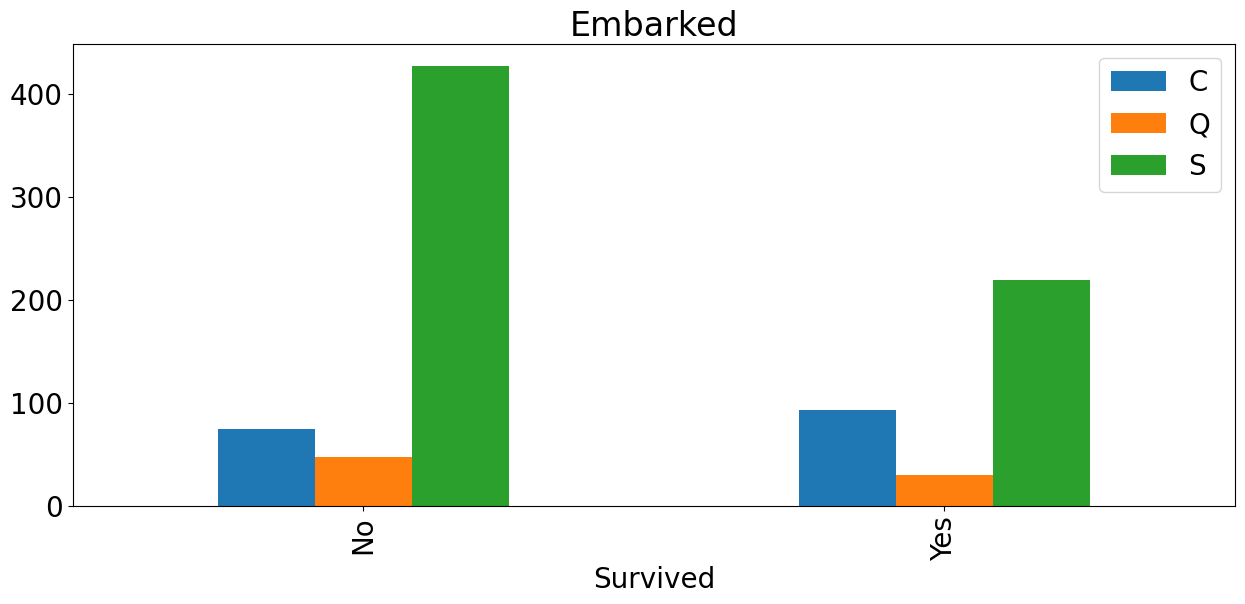

In [126]:
to_plot = ['Pclass','Sex','Parch','SibSp','Embarked']

for col in to_plot:
    bar_charts(titanic,col)

## Pclass, Sex, Parch, SibSp, embarked by percentage

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

In [111]:
def percentage_barchart(df, feature):
    font = {'size': 12}
    plt.rc('font', **font)

    total = df.groupby(by=feature).agg({'PassengerId':'count'}).reset_index()
    yes = df[df["Survived"] == 1].groupby(by=feature).agg({'PassengerId':'count'}).reset_index()

    yes['PassengerId_P'] = [i/j*100 for i,j in zip(yes['PassengerId'], total['PassengerId'])]
    total['PassengerId_P'] = [i/j*100 for i,j in zip(total['PassengerId'], total['PassengerId'])]

    bar1 = sns.barplot(data=total, x=feature, y='PassengerId_P', color='darkblue')
    bar2 = sns.barplot(data=yes, x=feature, y='PassengerId_P', color='lightblue')

    #add legend
    top_bar = mpatches.Patch(color='darkblue', label='survived = No')
    bottom_bar = mpatches.Patch(color='lightblue', label='survived = Yes')
    plt.legend(handles=[top_bar, bottom_bar], bbox_to_anchor=(1, 1))
    plt.title('Percentage of passengers survived by ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Percentage of passengers')
    plt.show()

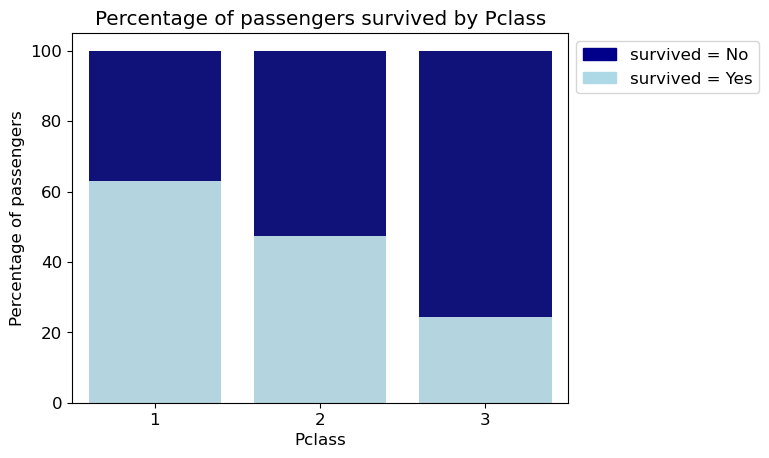

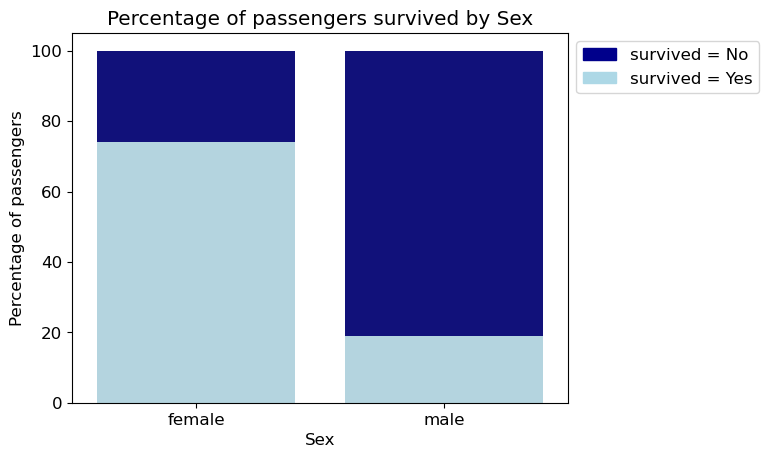

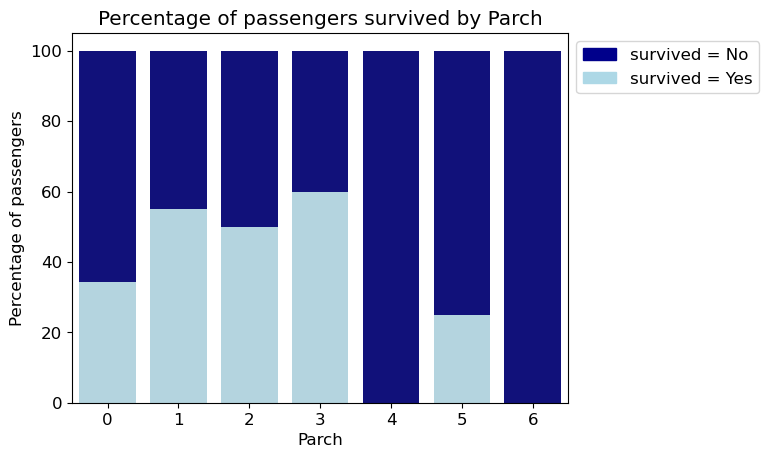

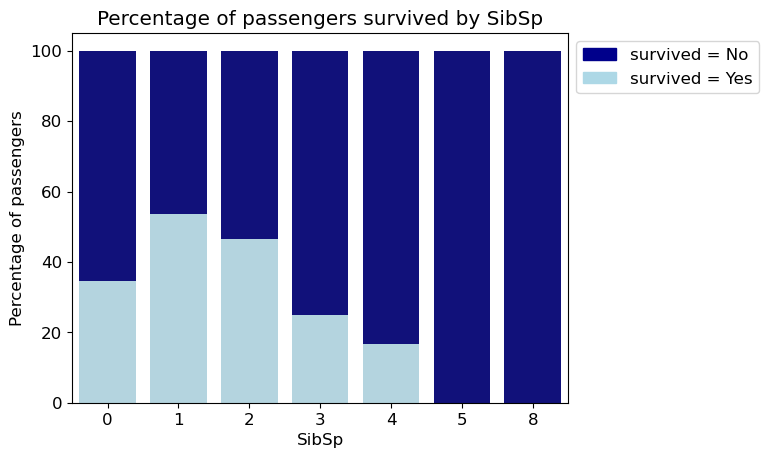

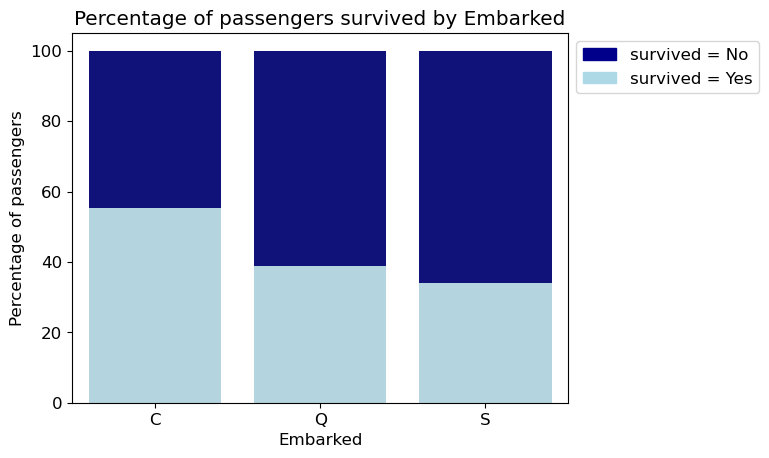

In [114]:
# ANSWER
#titanic.columns
to_plot = ['Pclass','Sex','Parch','SibSp','Embarked']

for col in to_plot:
    percentage_barchart(titanic,col)

Note:
I used percentage instead of the absolute count, because this account for unequal number of people in each class. 

* Percentage of passengers from class 1 survived more than class 3. 
* High percentage of females survived. 
* High percentage of passengers with less number of siblings/spouse on board survived??
* People from Cherboug seems to survived more, but need statistic test.

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [127]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [139]:
# ANSWER
titanic["Fare_class"] = [create_fare_class(i) for i in titanic['Fare']]
titanic['Fare_class'].unique()

array([4, 1, 2, 3])

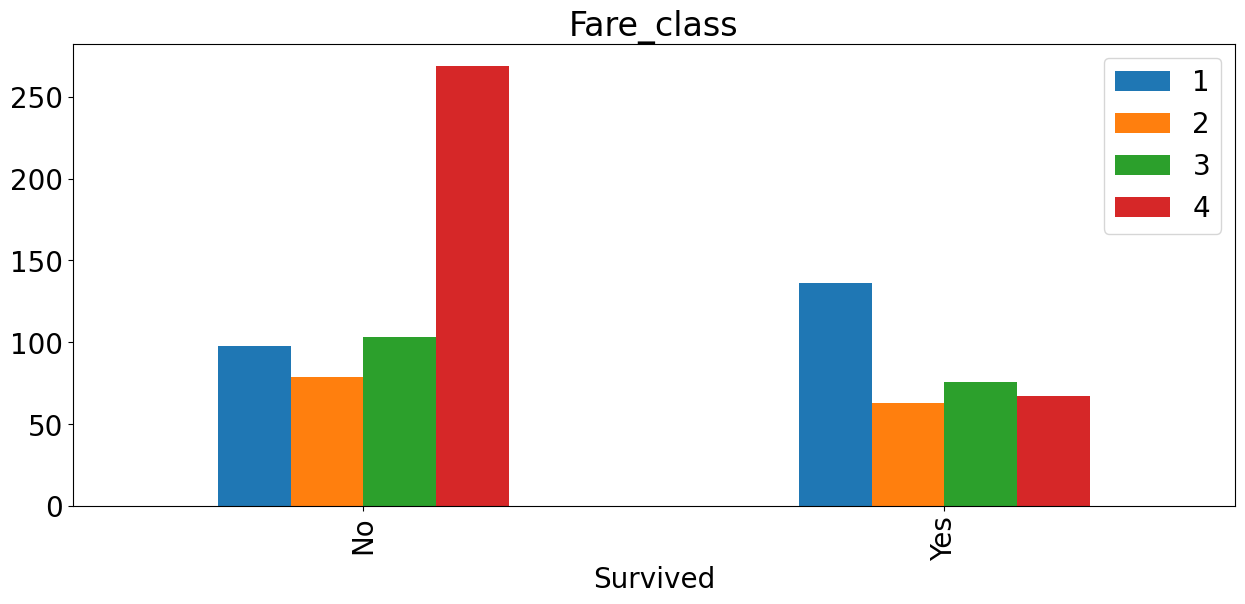

In [140]:
bar_charts(titanic,'Fare_class')

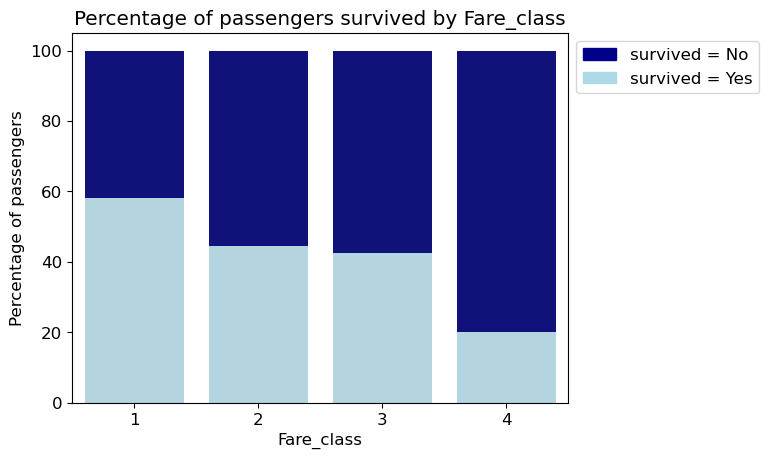

In [141]:
percentage_barchart(titanic, 'Fare_class')

Low percentage of people with class 4 tickets survived.

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [142]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [143]:
# ANSWER
titanic["Age_class"] = [create_age_class(i) for i in titanic['Age']]
titanic['Age_class'].unique()

array([2, 4, 3, 1, 5])

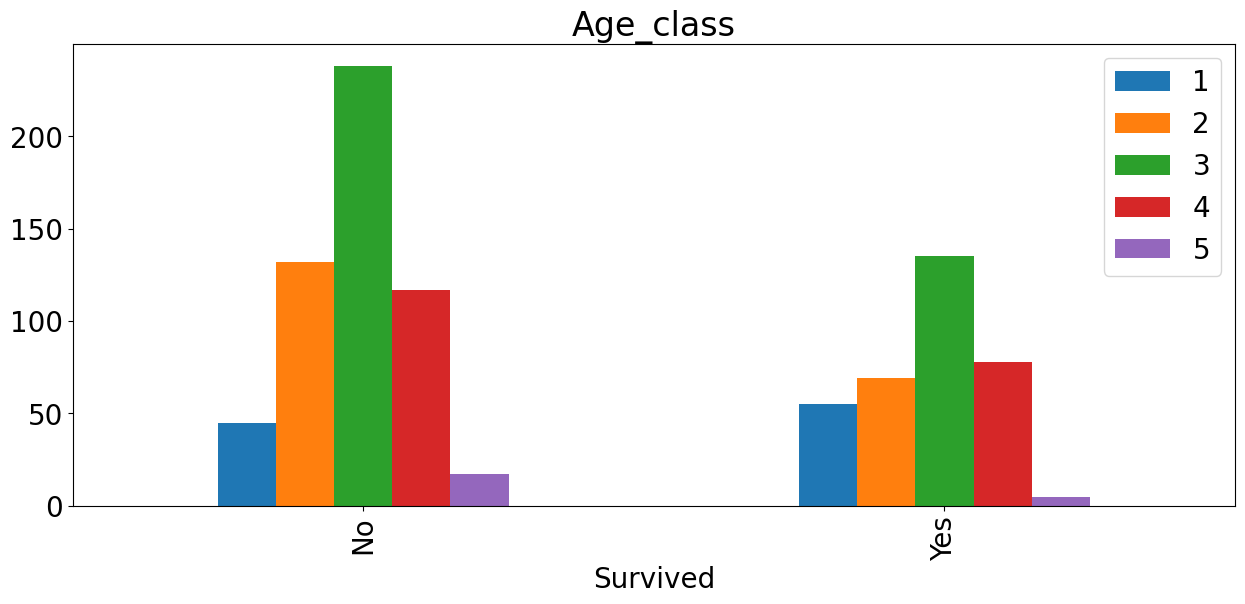

In [144]:
bar_charts(titanic,'Age_class')

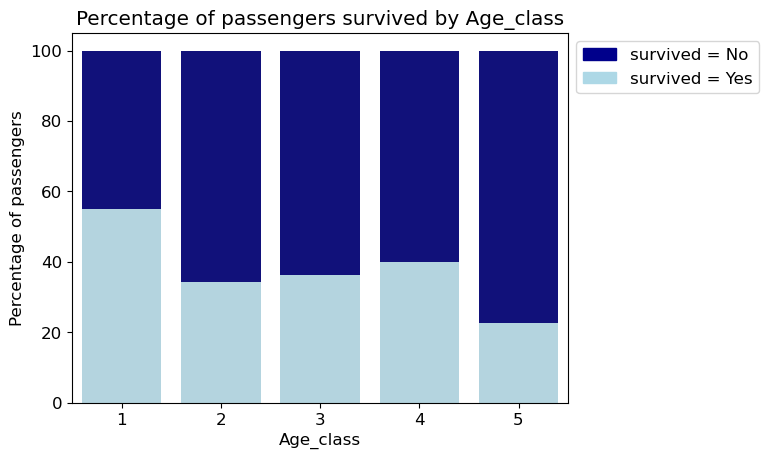

In [145]:
percentage_barchart(titanic, 'Age_class')

Compared to the other groups, the percentage of people in group 5 (older than 60 years old) survived is low.  

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [146]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Fare_class   891 non-null    int64  
 13  Age_class    891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [153]:
# Turn sex into the integer (boolean)
titanic["Sex_class"] = [0 if str(i) == 'male' else 1 for i in titanic["Sex"] ]

In [154]:
# ANSWER
drop_list = ['PassengerId', 'Name','Sex','Ticket','Cabin','Embarked']
titanic.drop(drop_list, axis=1).corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.073296 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.338056  0.083081  0.018443 -0.549500   
Age        -0.073296 -0.338056  1.000000 -0.236376 -0.176038  0.094161   
SibSp      -0.035322  0.083081 -0.236376  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.176038  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.094161  0.159651  0.216225  1.000000   
Fare_class -0.307600  0.719670 -0.113032 -0.380692 -0.387100 -0.599129   
Age_class  -0.067911 -0.292128  0.928753 -0.232166 -0.168121  0.075551   
Sex_class   0.543351 -0.131900 -0.095256  0.114631  0.245489  0.182333   

            Fare_class  Age_class  Sex_class  
Survived     -0.307600  -0.067911   0.543351  
Pclass        0.719670  -0.292128  -0.131900  
Age          -0.113032   0.928753  -0.095256  
SibSp        -0.380692  -0.232166   0.114631  
Parch        -0.387100  -0.168121   0.245489  
Fare         -0.599129   0.075551   0.182333  
Fare_class    1.000000  -0.080506  -0.239309  
Age_class    -0.080506   1.000000  -0.090941  
Sex_class    -0.239309  -0.090941   1.000000

<Axes: >

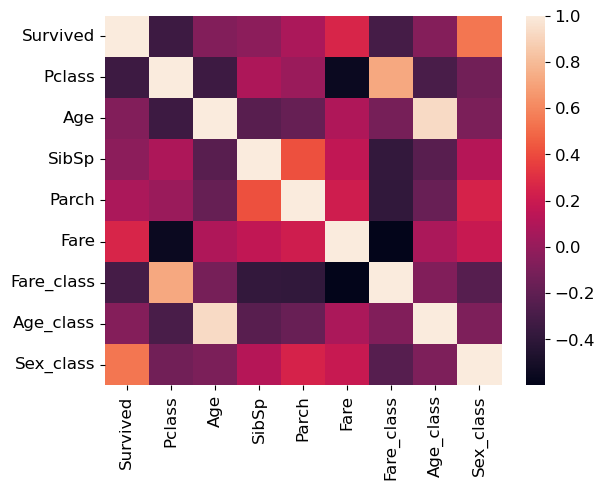

In [168]:
sns.heatmap(titanic.drop(drop_list, axis=1).corr())

Pclass, Fare and sex seems to be correlated with survival.

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [156]:
N=100
# ANSWER
titanic_survived = titanic[titanic["Survived"] == 1].sample(N)
titanic_died = titanic[titanic["Survived"] == 0].sample(N)
titanic_survived.describe()


PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   100.000000     100.0  100.000000  100.000000  100.000000  100.000000   
mean    463.910000       1.0    1.950000   28.622500    0.480000    0.490000   
std     266.329943       0.0    0.833333   13.781526    0.688726    0.834787   
min       3.000000       1.0    1.000000    0.420000    0.000000    0.000000   
25%     240.250000       1.0    1.000000   22.000000    0.000000    0.000000   
50%     512.000000       1.0    2.000000   27.500000    0.000000    0.000000   
75%     693.750000       1.0    3.000000   36.000000    1.000000    1.000000   
max     890.000000       1.0    3.000000   60.000000    4.000000    5.000000   

             Fare  Fare_class   Age_class   Sex_class  
count  100.000000  100.000000  100.000000  100.000000  
mean    52.932086    2.260000    2.790000    0.650000  
std     94.398069    1.115728    1.027845    0.479372  
min      7.225000    1.000000    1.000000    0.000000  
25%     12.912500    1.000000    2.000000    0.000000  
50%     26.000000    2.000000    3.000000    1.000000  
75%     44.054200    3.000000    4.000000    1.000000  
max    512.329200    4.000000    4.000000    1.000000

In [157]:
titanic_died.describe()

PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   100.000000     100.0  100.000000  100.000000  100.000000  100.000000   
mean    454.560000       0.0    2.540000   29.695000    0.420000    0.280000   
std     260.834454       0.0    0.730573   12.770091    1.016828    0.636912   
min      30.000000       0.0    1.000000    1.000000    0.000000    0.000000   
25%     180.500000       0.0    2.000000   21.750000    0.000000    0.000000   
50%     484.500000       0.0    3.000000   29.000000    0.000000    0.000000   
75%     691.000000       0.0    3.000000   34.000000    0.000000    0.000000   
max     891.000000       0.0    3.000000   70.500000    5.000000    3.000000   

             Fare  Fare_class   Age_class  Sex_class  
count  100.000000  100.000000  100.000000  100.00000  
mean    17.913749    3.070000    2.800000    0.15000  
std     17.586343    1.094107    0.963998    0.35887  
min      0.000000    1.000000    1.000000    0.00000  
25%      7.775000    2.000000    2.000000    0.00000  
50%     11.368750    3.000000    3.000000    0.00000  
75%     21.018750    4.000000    3.000000    0.00000  
max    106.425000    4.000000    5.000000    1.00000

In [158]:
a = titanic_survived['Age']
b = titanic_died['Age']

### Set alpha (let alpha = 0.05)


In [159]:
# ANSWER
alpha=0.05

### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [160]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [161]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [163]:
from scipy import stats

In [164]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [165]:
print("t = " + str(t))
print("p = " + str(p))

t = -0.5708295605226573
p = 0.5687624644895384


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [166]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [167]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -0.5708295605226572
p = 0.5687624644895386
We fail to reject our null hypothesis.


...which means there is no difference in the survival rate between the young and old passengers.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



